In [ ]:
import tiktoken

text1 = "Hello, Generative AI! Let's visualize tokenization. "
text = "Generative AI models like GPT and Gemini are amazing "

In [2]:
# Load OpenAI tokenizer (used by GPT-3.5 / GPT-4)
enc = tiktoken.get_encoding("cl100k_base")

In [3]:
# Encode and decode
token_ids = enc.encode(text)
tokens = [enc.decode([tid]) for tid in token_ids]

In [4]:
print("Original text:", text)
print("\nToken IDs:", token_ids)
print("\nTokens:", tokens)
print("\nTotal token count:", len(token_ids))

Original text: Generative AI models like GPT and Gemini are amazing 

Token IDs: [5648, 1413, 15592, 4211, 1093, 480, 2898, 323, 86811, 527, 8056, 220]

Tokens: ['Gener', 'ative', ' AI', ' models', ' like', ' G', 'PT', ' and', ' Gemini', ' are', ' amazing', ' ']

Total token count: 12


In [5]:
import pandas as pd

text1 = "Hello, Generative AI! Let's visualize tokenization."
text = "Generative AI models like GPT and Gemini are amazing "

In [ ]:
# Load a tokenizer (e.g., GPT-2)
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
#is used to load a tokenizer for the GPT-2 model using Hugging Face's Transformers library

c:\Users\a812616\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
c:\Users\a812616\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\a812616\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/

In [7]:
# Encode with offset mapping
encoded = tokenizer(text, return_offsets_mapping=True, add_special_tokens=False)
tokens = tokenizer.convert_ids_to_tokens(encoded["input_ids"])
offsets = encoded["offset_mapping"]

In [8]:
# Create a DataFrame for visualization
data = []
for i, (tok, (start, end)) in enumerate(zip(tokens, offsets)):
    data.append({
        "Index": i,
        "Token": tok,
        "Character Span": f"{start}:{end}",
        "Text Snippet": text[start:end]
    })

In [9]:
df = pd.DataFrame(data)
print("Tokenization Table:\n")
print(df)

Tokenization Table:

    Index     Token Character Span Text Snippet
0       0     Gener            0:5        Gener
1       1     ative           5:10        ative
2       2       ĠAI          10:13           AI
3       3   Ġmodels          13:20       models
4       4     Ġlike          20:25         like
5       5        ĠG          25:27            G
6       6        PT          27:29           PT
7       7      Ġand          29:33          and
8       8   ĠGemini          33:40       Gemini
9       9      Ġare          40:44          are
10     10  Ġamazing          44:52      amazing
11     11         Ġ          52:53             


In [10]:
import matplotlib.pyplot as plt

In [11]:
tokens = df["Token"]
lengths = df["Text Snippet"].apply(len)

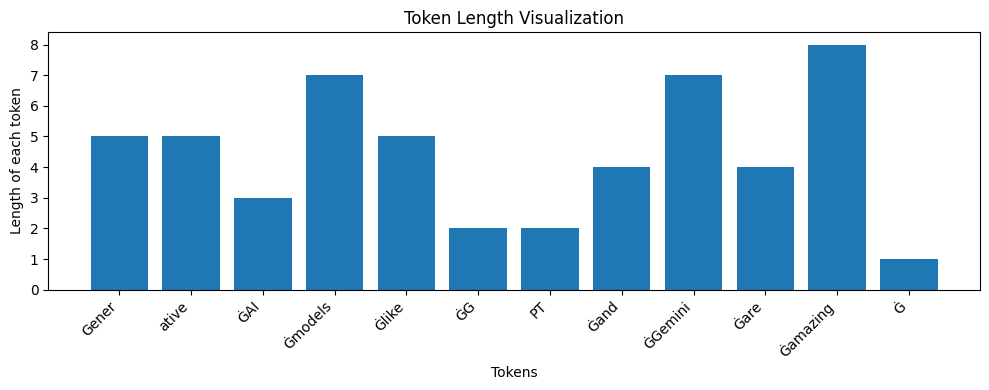

In [12]:
plt.figure(figsize=(10,4))
plt.bar(range(len(tokens)), lengths)
plt.xticks(range(len(tokens)), tokens, rotation=45, ha='right')
plt.xlabel("Tokens")
plt.ylabel("Length of each token")
plt.title("Token Length Visualization")
plt.tight_layout()
plt.show()